In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

--2024-11-02 23:48:20--  http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz             [    <=>             ] 879.65M  8.65MB/s    in 95s     

2024-11-02 23:50:00 (9.25 MB/s) - ‘SUSY.csv.gz’ saved [922377711]



In [2]:
!rm SUSY.csv

rm: cannot remove 'SUSY.csv': No such file or directory


In [3]:
!gunzip SUSY.csv.gz

In [4]:
ls -lh

total 2.3G
-rw-r--r-- 1 jomus jomus  13K Sep  2 23:59 Lab.2.ipynb
-rw-r--r-- 1 jomus jomus  28K Sep  9 01:04 Lab2.ipynb
-rw-r--r-- 1 jomus jomus 2.4K Sep 10 00:18 Quiz1.ipynb
-rw-r--r-- 1 jomus jomus 2.3G Nov  2 23:50 SUSY.csv
-rw-r--r-- 1 jomus jomus  17K Sep 10 16:21 Untitled.ipynb
-rw-r--r-- 1 jomus jomus  23K Nov  2 23:50 Untitled1.ipynb


In [5]:
filename = "SUSY.csv"

!head -5 "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [6]:
!wc -l SUSY.csv

5000000 SUSY.csv


In [7]:
!head -500000 SUSY.csv > SUSY-small.csv

In [8]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

In [9]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [10]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [11]:
FeatureNames

['M_Delta_R',
 'axial_MET',
 'M_TR_2',
 'S_R',
 'MET_rel',
 'M_R',
 'MT2',
 'cos_theta_r1',
 'dPhi_r_b',
 'R']

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [14]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


In [15]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

l_1_pT


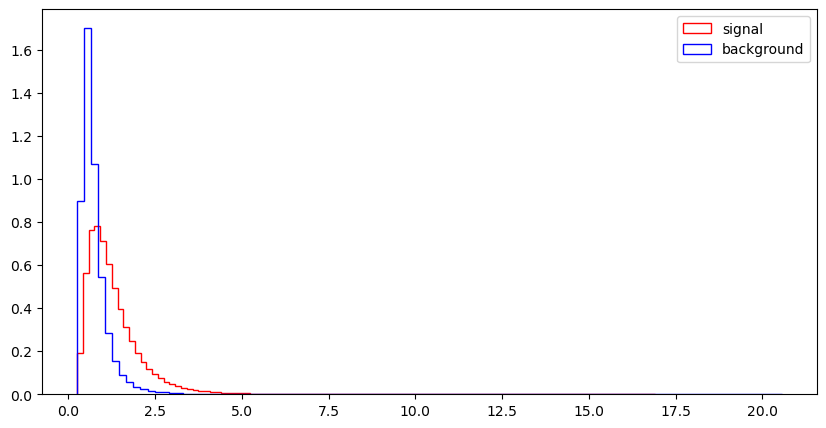

l_1_eta


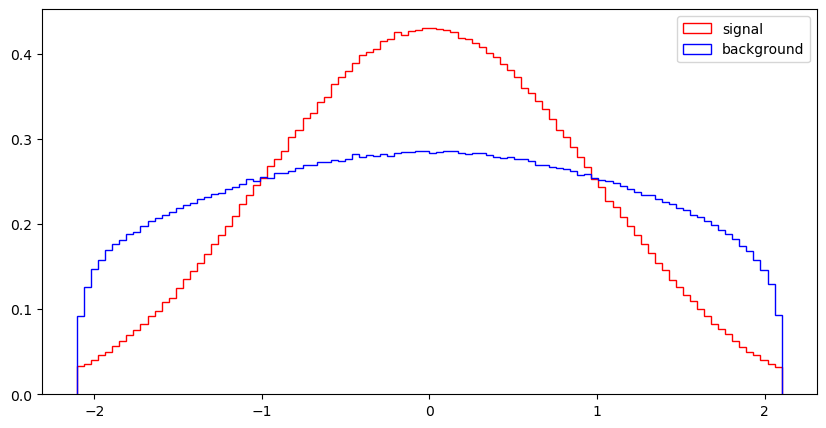

l_1_phi


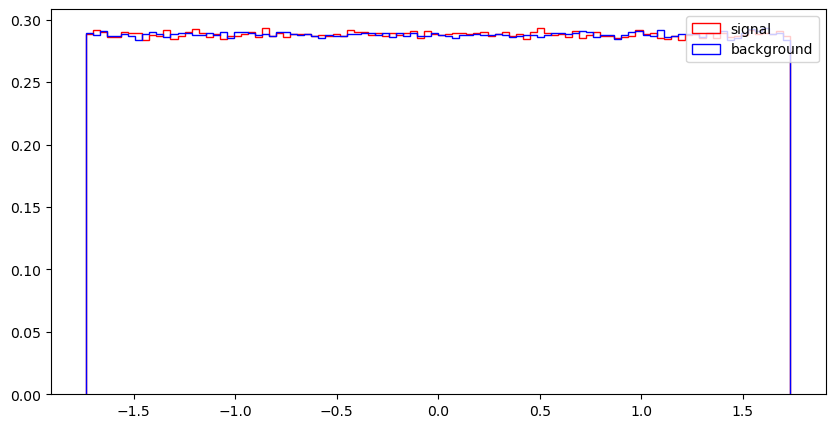

l_2_pT


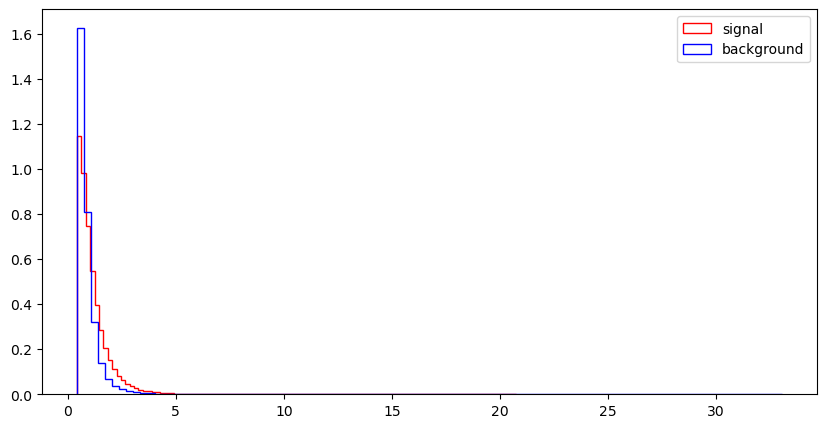

l_2_eta


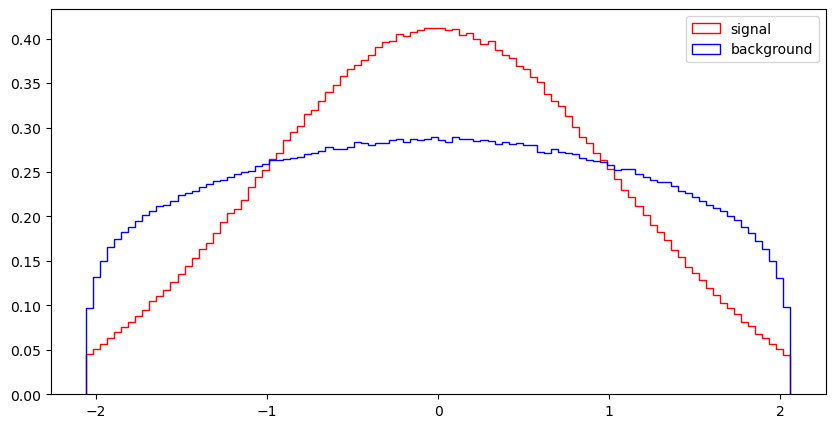

l_2_phi


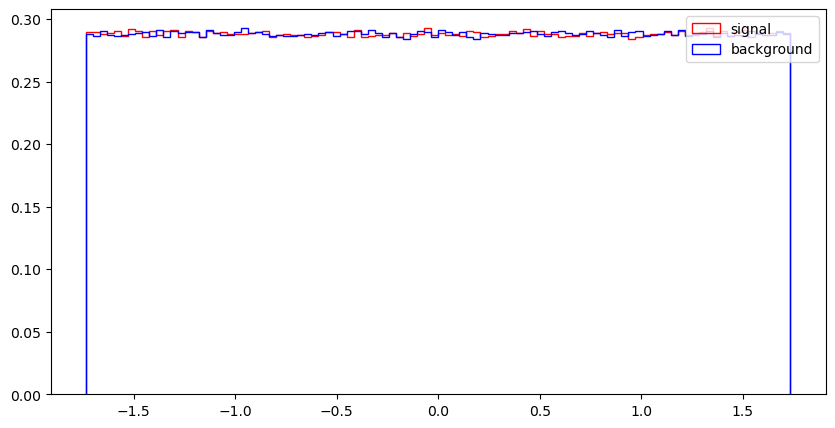

MET


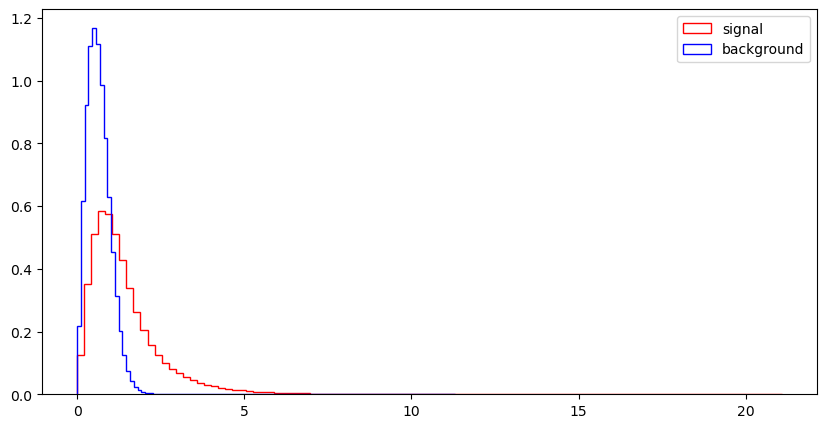

MET_phi


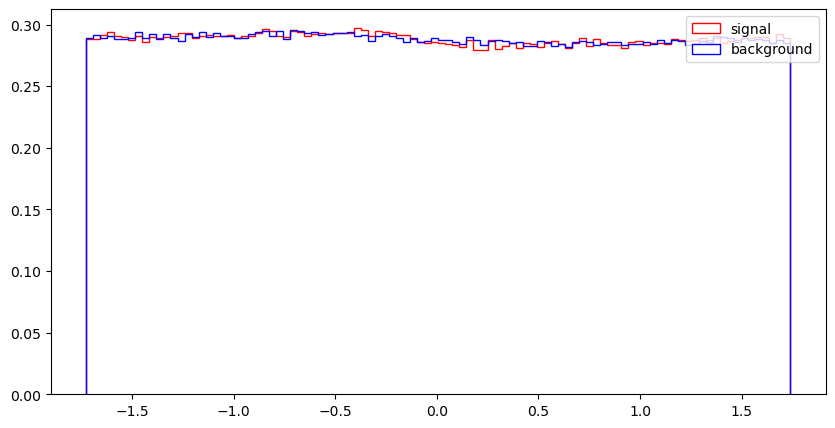

MET_rel


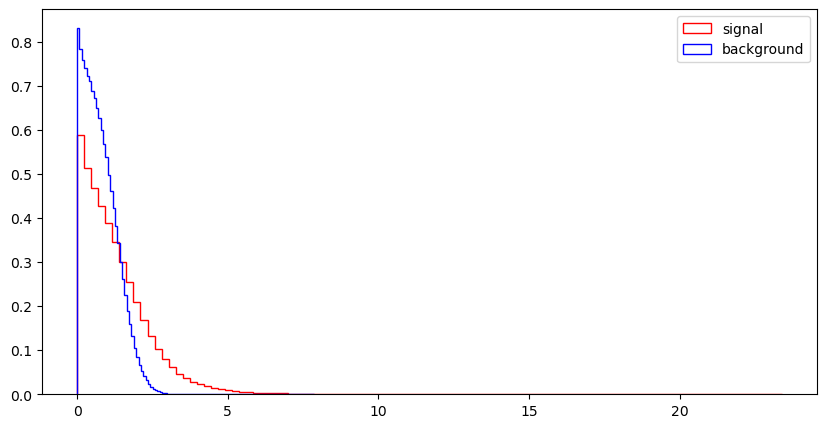

axial_MET


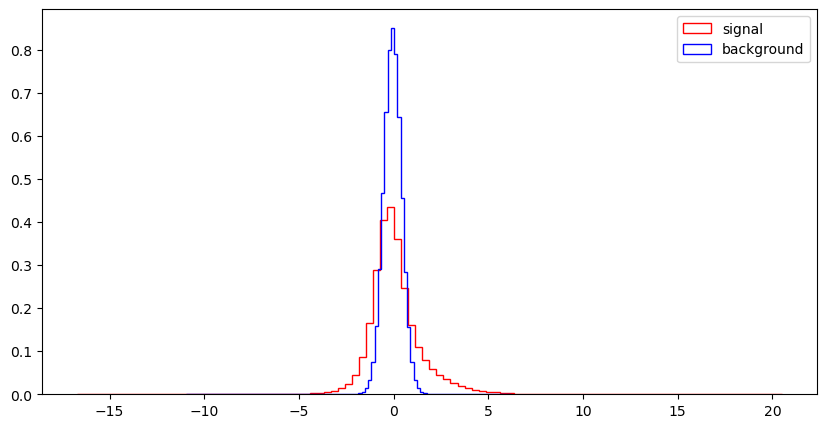

M_R


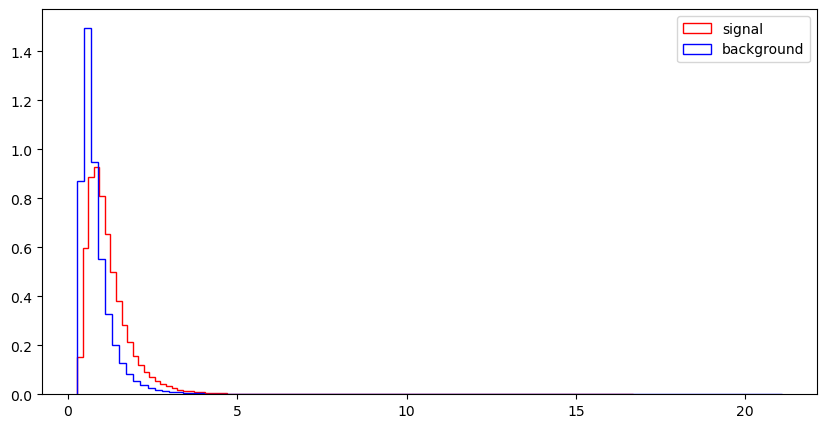

M_TR_2


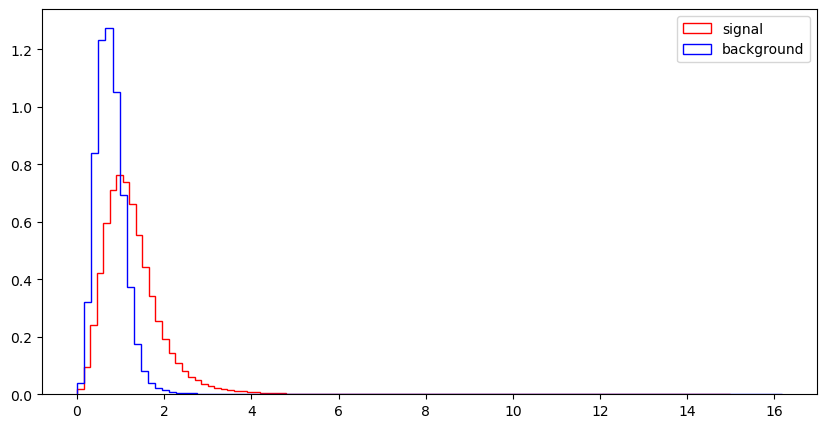

R


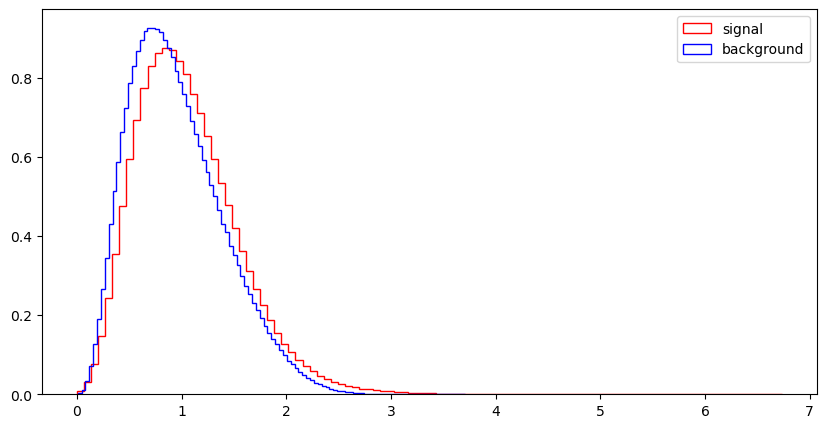

MT2


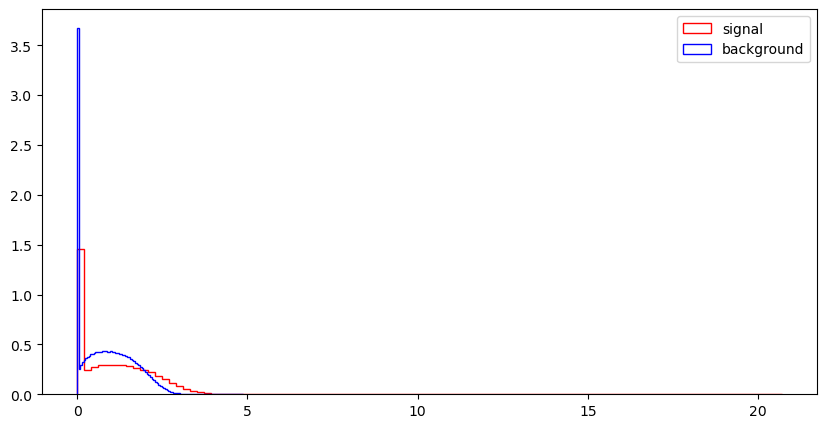

S_R


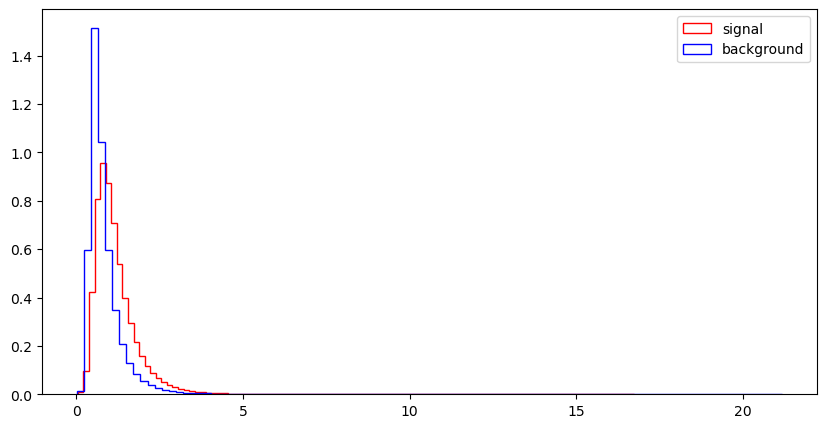

M_Delta_R


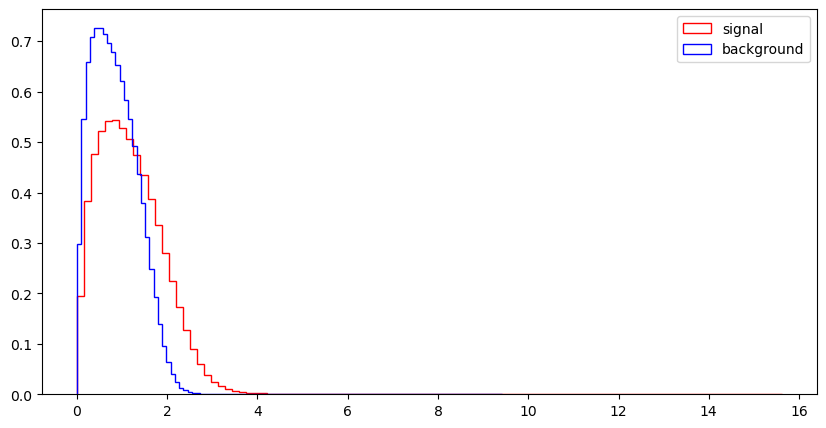

dPhi_r_b


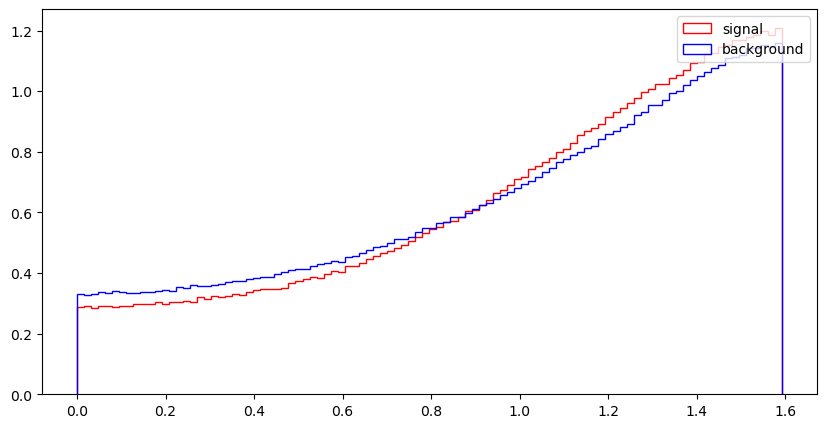

cos_theta_r1


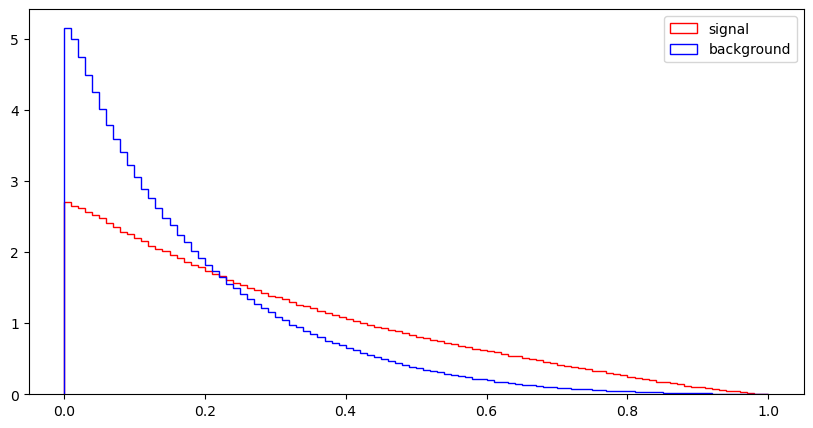

In [16]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

# 3

In [17]:
import matplotlib.pyplot as plt

raw_features = [
    "l_1_pT", "l_1_eta", "l_1_phi",
    "l_2_pT", "l_2_eta", "l_2_phi",
    "MET", "MET_phi"
]

high_level_features = [
    "MET_rel", "axial_MET", "M_R",
    "M_TR_2", "R", "MT2", "S_R",
    "M_Delta_R", "dPhi_r_b", "cos_theta_r1"
]

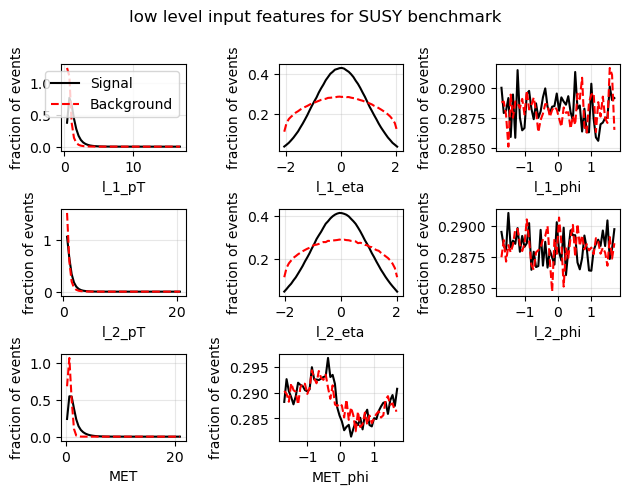

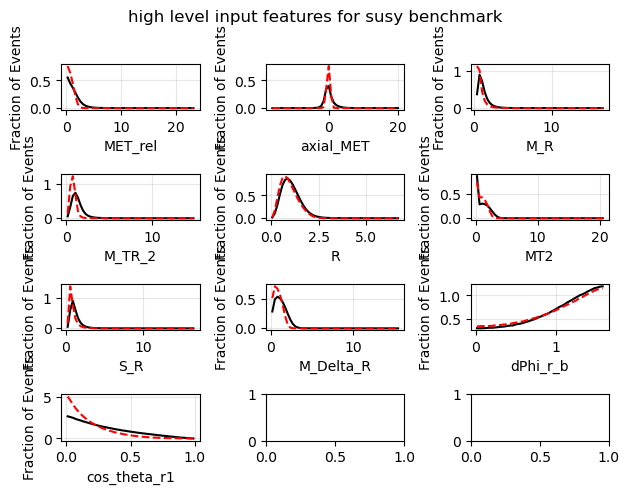

In [18]:

df_sig = df[df['signal'] == 1]
df_bkg = df[df['signal'] == 0]

fig, axes = plt.subplots(3,3)

axes = axes.flatten()

plt.suptitle('low level input features for SUSY benchmark', y=1.02, fontsize = 12)

for i, feature in enumerate(raw_features):
    
    if i < len(axes):
        
        bins = 50
        
        sig_data = df_sig[feature]
        
        bkg_data = df_bkg[feature]
        
        sig_hist, bin_edges = np.histogram(sig_data, bins=bins, density = True)
        
        bkg_hist, c = np.histogram(bkg_data, bins = bin_edges, density = True)
        
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        axes[i].plot(bin_centers, sig_hist, 'k-', linewidth=1.5, label = 'Signal')
        
        axes[i].plot(bin_centers, bkg_hist, 'r--', linewidth= 1.5, label = 'Background')
        
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('fraction of events')
        axes[i].grid(True, alpha =0.3)
        
        if i == 0:
            axes[i].legend()
            
for i in range(len(raw_features), len(axes)):
    axes[i].set_visible(False)
    
plt.tight_layout()
plt.show()

rows = int(np.ceil(len(high_level_features)/ 3))

fig, axes = plt.subplots(rows, 3)

axes = axes.flatten()

plt.suptitle('high level input features for susy benchmark', y = 1.02 , fontsize = 12)

for i, feature in enumerate(high_level_features):
    
    if i < len(axes):
        
        bins = 50
        
        sig_data = df_sig[feature]
        
        bkg_data = df_bkg[feature]
        
        sig_hist, bin_edges = np.histogram(sig_data, bins = bins, density = True)
        bkg_hist, c = np.histogram(bkg_data, bins = bin_edges, density= True)
        
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        axes[i].plot(bin_centers, sig_hist, 'k-', linewidth=1.5, label='Signal')
        axes[i].plot(bin_centers, bkg_hist, 'r--', linewidth=1.5, label='Background')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Fraction of Events')
        axes[i].grid(True, alpha=0.3)        

        
plt.tight_layout()
plt.show()

# 4

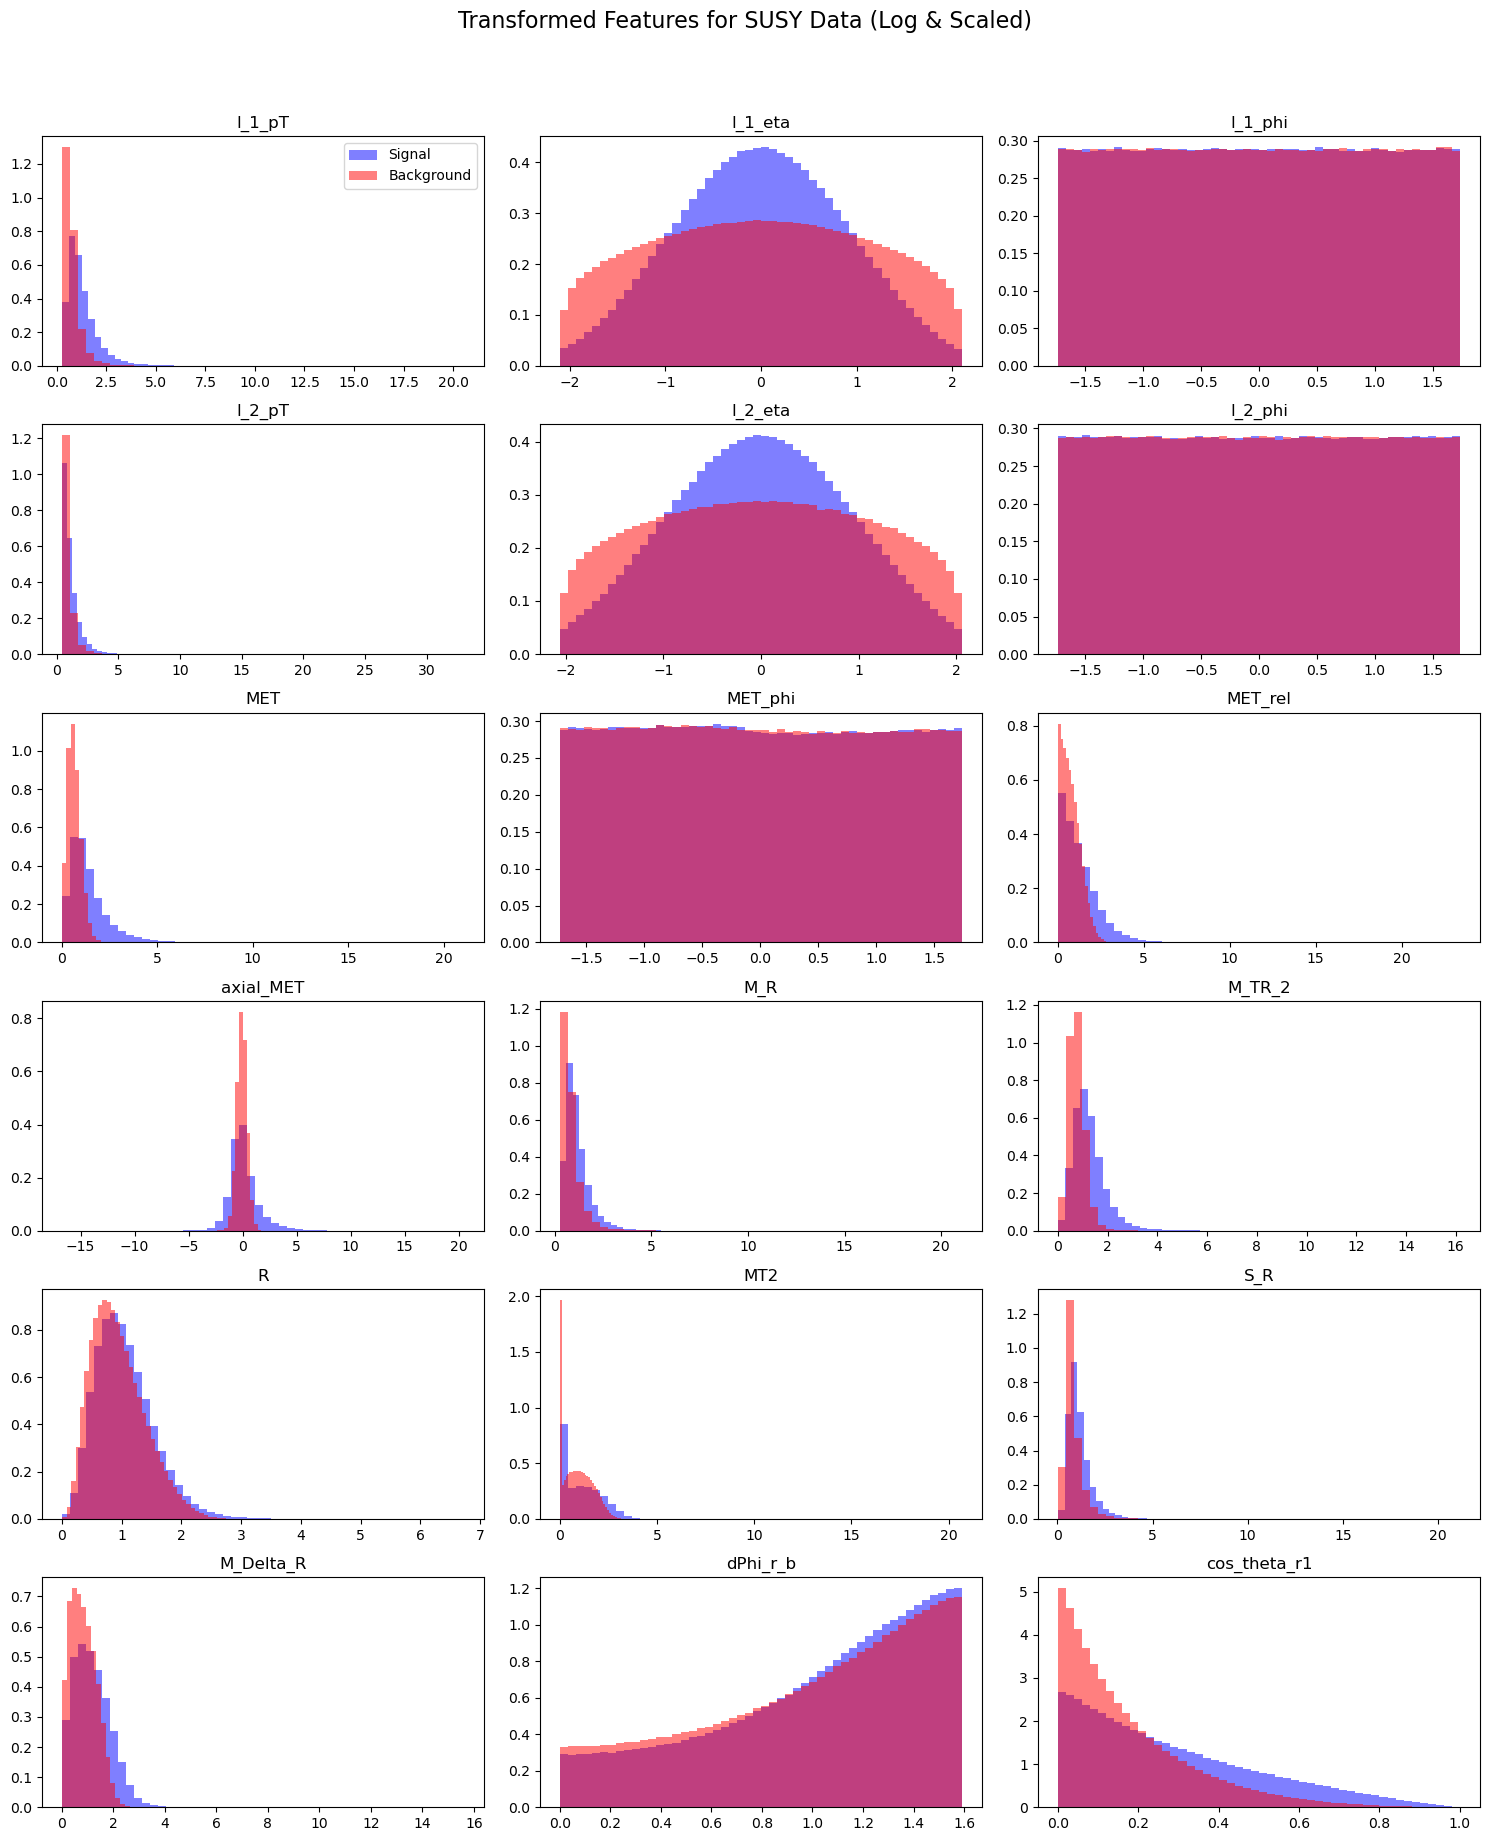

/usr/lib/python3/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
df_transformed = df.copy ()

df_transformed_sig = df_transformed[df_transformed.signal == 1]
df_transformed_bkg = df_transformed[df_transformed.signal == 0]

num_features = len(raw_features + high_level_features)
fig, axes = plt.subplots(6, 3, figsize=(15, 18))
fig.suptitle("Transformed Features for SUSY Data (Log & Scaled)", y=1.02, fontsize=16)

for i, feature in enumerate(raw_features + high_level_features):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    bins = 50
    ax.hist(df_transformed_sig[feature], bins=bins, color="blue", alpha=0.5, density=True, label="Signal")
    ax.hist(df_transformed_bkg[feature], bins=bins, color="red", alpha=0.5, density=True, label="Background")
    ax.set_title(feature)
    
    if i == 0:
        ax.legend()
        
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()





for feature in raw_features + high_level_features : 
    
    if feature not in ["l_1_eta", "l_1_phi", "l_2_eta", "l_2_phi", "MET_phi", "dPhi_r_b", "cos_theta_r1"] :
        
        df_transformed[feature] = np.log1p(df_transformed[feature])

for feature in raw_features + high_level_features:
    
    mean = df_transformed[feature].mean()
    std = df_transformed[feature].std()
    df_transformed[feature] = (df_transformed[feature] - mean) / std
    

    
    
        

    we can downsample to speed up plotting
   

In [23]:
downsample = 0.1

df_sig_downsampled = df_sig.sample(frac=downsample, random_state = 42)

df_bkg_downsampled = df_bkg.sample(frac=downsample, random_state = 42)

## C


In [24]:
best_features = []

for feature in raw_features:
    sig_hist, bin_edges = np.histogram(df_sig[feature], bins=50, density=True)
    bkg_hist, _ = np.histogram(df_bkg[feature], bins=bin_edges, density=True)
    
    b_distance = -np.log(np.sum(np.sqrt(sig_hist * bkg_hist)))
    
    best_features.append((feature, b_distance))

best_features.sort(key=lambda x: x[1], reverse=True)

print("Best features for separating signal from background:")
for feature, score in best_features:
    print(f"{feature}: Bhattacharyya distance = {score:.3f}")

Best features for separating signal from background:
MET: Bhattacharyya distance = -0.686
l_2_pT: Bhattacharyya distance = -0.876
l_1_pT: Bhattacharyya distance = -0.983
l_1_eta: Bhattacharyya distance = -2.450
l_2_eta: Bhattacharyya distance = -2.478
l_1_phi: Bhattacharyya distance = -2.668
l_2_phi: Bhattacharyya distance = -2.668
MET_phi: Bhattacharyya distance = -2.668


## 4.2 , installed tabulate

In [25]:
cov_matrix_low = np.cov(df[raw_features], rowvar= False)
corr_matrix_low = np.corrcoef(df[raw_features], rowvar = False)

cov_matrix_high = np.cov(df[high_level_features], rowvar = False)

corr_matrix_high = np.corrcoef(df[high_level_features], rowvar = False)



In [26]:
from IPython.display import HTML, display
import tabulate


In [27]:
cov_table_low = tabulate.tabulate(cov_matrix_low, headers = raw_features, floatfmt='.3f', tablefmt = 'html')
corr_table_low = tabulate.tabulate(corr_matrix_low, headers = raw_features, floatfmt = '.3f', tablefmt = 'html')


display(HTML("<h3>Covariance Matrix (Low-Level Features)</h3>" + cov_table_low))
display(HTML("<h3>Correlation Matrix (Low-Level Features)</h3>" + corr_table_low))

l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
0.472,-0.000,-0.000,0.308,-0.000,0.000,0.231,-0.001
-0.000,1.006,0.000,-0.000,0.406,0.000,-0.001,-0.001
-0.000,0.000,1.003,-0.000,0.001,-0.268,0.001,-0.184
0.308,-0.000,-0.000,0.428,-0.000,0.000,0.080,-0.001
-0.000,0.406,0.001,-0.000,1.006,-0.000,0.000,-0.000
0.000,0.000,-0.268,0.000,-0.000,1.003,0.000,-0.034
0.231,-0.001,0.001,0.080,0.000,0.000,0.762,-0.002
-0.001,-0.001,-0.184,-0.001,-0.000,-0.034,-0.002,1.003


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
1.000,-0.000,-0.000,0.685,-0.000,0.000,0.385,-0.001
-0.000,1.000,0.000,-0.001,0.403,0.000,-0.001,-0.001
-0.000,0.000,1.000,-0.000,0.001,-0.267,0.001,-0.184
0.685,-0.001,-0.000,1.000,-0.001,0.000,0.140,-0.002
-0.000,0.403,0.001,-0.001,1.000,-0.000,0.000,-0.000
0.000,0.000,-0.267,0.000,-0.000,1.000,0.000,-0.034
0.385,-0.001,0.001,0.140,0.000,0.000,1.000,-0.002
-0.001,-0.001,-0.184,-0.002,-0.000,-0.034,-0.002,1.000


In [28]:
cov_table_high = tabulate.tabulate(cov_matrix_high, headers=high_level_features, floatfmt=".3f", tablefmt="html")
corr_table_high = tabulate.tabulate(corr_matrix_high, headers=high_level_features, floatfmt=".3f", tablefmt="html")

display(HTML("<h3>Covariance Matrix (High-Level Features)</h3>" + cov_table_high))
display(HTML("<h3>Correlation Matrix (High-Level Features)</h3>" + corr_table_high))


MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0.792,-0.125,0.044,0.303,0.250,0.410,0.082,0.416,0.147,0.056
-0.125,1.003,0.015,-0.189,-0.182,-0.460,-0.043,-0.234,-0.026,-0.054
0.044,0.015,0.395,0.212,-0.113,-0.037,0.383,0.074,-0.029,-0.014
0.303,-0.189,0.212,0.341,0.104,0.189,0.230,0.242,0.058,0.052
0.250,-0.182,-0.113,0.104,0.222,0.232,-0.083,0.166,0.087,0.058
0.410,-0.460,-0.037,0.189,0.232,0.738,-0.011,0.433,0.021,0.045
0.082,-0.043,0.383,0.230,-0.083,-0.011,0.385,0.096,-0.004,-0.010
0.416,-0.234,0.074,0.242,0.166,0.433,0.096,0.389,0.042,0.039
0.147,-0.026,-0.029,0.058,0.087,0.021,-0.004,0.042,0.190,0.009
0.056,-0.054,-0.014,0.052,0.058,0.045,-0.010,0.039,0.009,0.039


MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1.000,-0.141,0.078,0.583,0.595,0.536,0.149,0.749,0.378,0.317
-0.141,1.000,0.024,-0.323,-0.385,-0.535,-0.070,-0.375,-0.060,-0.274
0.078,0.024,1.000,0.578,-0.381,-0.068,0.981,0.189,-0.106,-0.115
0.583,-0.323,0.578,1.000,0.380,0.378,0.636,0.666,0.228,0.451
0.595,-0.385,-0.381,0.380,1.000,0.574,-0.285,0.564,0.424,0.627
0.536,-0.535,-0.068,0.378,0.574,1.000,-0.021,0.808,0.056,0.263
0.149,-0.070,0.981,0.636,-0.285,-0.021,1.000,0.248,-0.013,-0.084
0.749,-0.375,0.189,0.666,0.564,0.808,0.248,1.000,0.156,0.319
0.378,-0.060,-0.106,0.228,0.424,0.056,-0.013,0.156,1.000,0.106
0.317,-0.274,-0.115,0.451,0.627,0.263,-0.084,0.319,0.106,1.000


In [29]:
def display_matrices(df, features):
    
    cov_matrix = np.cov(df[features], rowvar=False)
    corr_matrix = np.corrcoef(df[features], rowvar=False)
    
    cov_table = tabulate.tabulate(cov_matrix, headers=features, floatfmt = '.3f', tablefmt = 'html')
    corr_table = tabulate.tabulate(corr_matrix, headers=features, floatfmt=".3f", tablefmt="html")

    display(HTML("<h3>Covariance Matrix</h3>" + cov_table))
    display(HTML("<h3>Correlation Matrix</h3>" + corr_table))
    
display_matrices(df, raw_features)
display_matrices(df, high_level_features)

l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
0.472,-0.000,-0.000,0.308,-0.000,0.000,0.231,-0.001
-0.000,1.006,0.000,-0.000,0.406,0.000,-0.001,-0.001
-0.000,0.000,1.003,-0.000,0.001,-0.268,0.001,-0.184
0.308,-0.000,-0.000,0.428,-0.000,0.000,0.080,-0.001
-0.000,0.406,0.001,-0.000,1.006,-0.000,0.000,-0.000
0.000,0.000,-0.268,0.000,-0.000,1.003,0.000,-0.034
0.231,-0.001,0.001,0.080,0.000,0.000,0.762,-0.002
-0.001,-0.001,-0.184,-0.001,-0.000,-0.034,-0.002,1.003


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
1.000,-0.000,-0.000,0.685,-0.000,0.000,0.385,-0.001
-0.000,1.000,0.000,-0.001,0.403,0.000,-0.001,-0.001
-0.000,0.000,1.000,-0.000,0.001,-0.267,0.001,-0.184
0.685,-0.001,-0.000,1.000,-0.001,0.000,0.140,-0.002
-0.000,0.403,0.001,-0.001,1.000,-0.000,0.000,-0.000
0.000,0.000,-0.267,0.000,-0.000,1.000,0.000,-0.034
0.385,-0.001,0.001,0.140,0.000,0.000,1.000,-0.002
-0.001,-0.001,-0.184,-0.002,-0.000,-0.034,-0.002,1.000


MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0.792,-0.125,0.044,0.303,0.250,0.410,0.082,0.416,0.147,0.056
-0.125,1.003,0.015,-0.189,-0.182,-0.460,-0.043,-0.234,-0.026,-0.054
0.044,0.015,0.395,0.212,-0.113,-0.037,0.383,0.074,-0.029,-0.014
0.303,-0.189,0.212,0.341,0.104,0.189,0.230,0.242,0.058,0.052
0.250,-0.182,-0.113,0.104,0.222,0.232,-0.083,0.166,0.087,0.058
0.410,-0.460,-0.037,0.189,0.232,0.738,-0.011,0.433,0.021,0.045
0.082,-0.043,0.383,0.230,-0.083,-0.011,0.385,0.096,-0.004,-0.010
0.416,-0.234,0.074,0.242,0.166,0.433,0.096,0.389,0.042,0.039
0.147,-0.026,-0.029,0.058,0.087,0.021,-0.004,0.042,0.190,0.009
0.056,-0.054,-0.014,0.052,0.058,0.045,-0.010,0.039,0.009,0.039


MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1.000,-0.141,0.078,0.583,0.595,0.536,0.149,0.749,0.378,0.317
-0.141,1.000,0.024,-0.323,-0.385,-0.535,-0.070,-0.375,-0.060,-0.274
0.078,0.024,1.000,0.578,-0.381,-0.068,0.981,0.189,-0.106,-0.115
0.583,-0.323,0.578,1.000,0.380,0.378,0.636,0.666,0.228,0.451
0.595,-0.385,-0.381,0.380,1.000,0.574,-0.285,0.564,0.424,0.627
0.536,-0.535,-0.068,0.378,0.574,1.000,-0.021,0.808,0.056,0.263
0.149,-0.070,0.981,0.636,-0.285,-0.021,1.000,0.248,-0.013,-0.084
0.749,-0.375,0.189,0.666,0.564,0.808,0.248,1.000,0.156,0.319
0.378,-0.060,-0.106,0.228,0.424,0.056,-0.013,0.156,1.000,0.106
0.317,-0.274,-0.115,0.451,0.627,0.263,-0.084,0.319,0.106,1.000


## 5

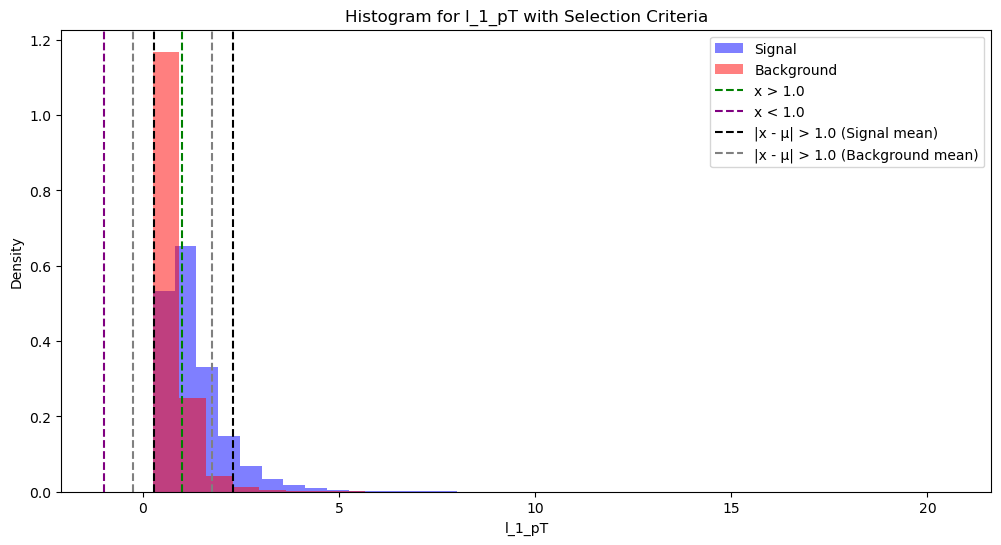

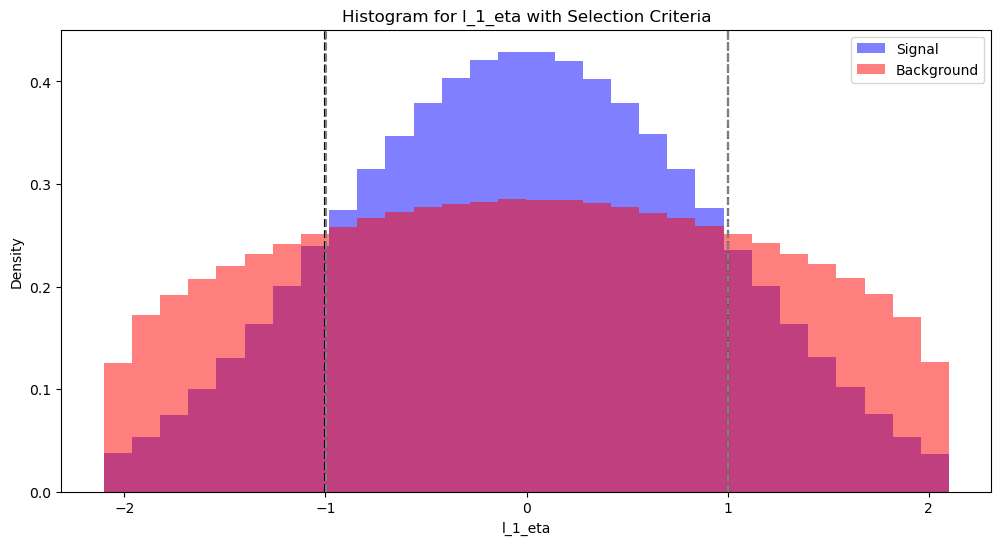

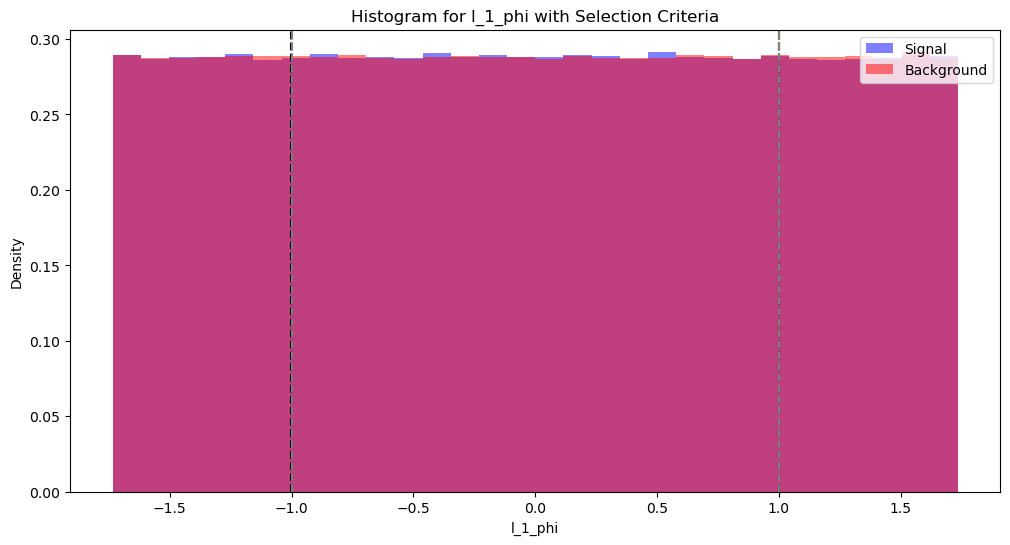

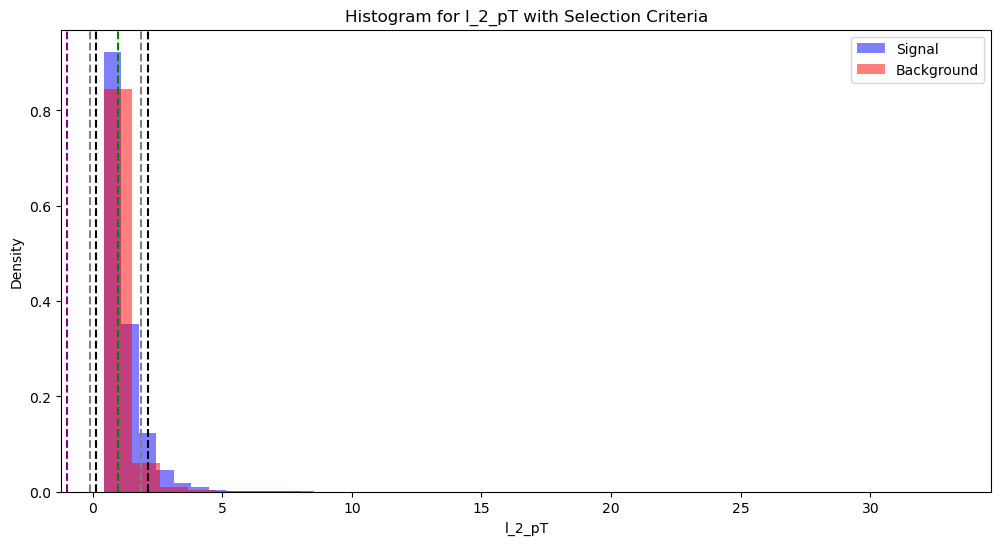

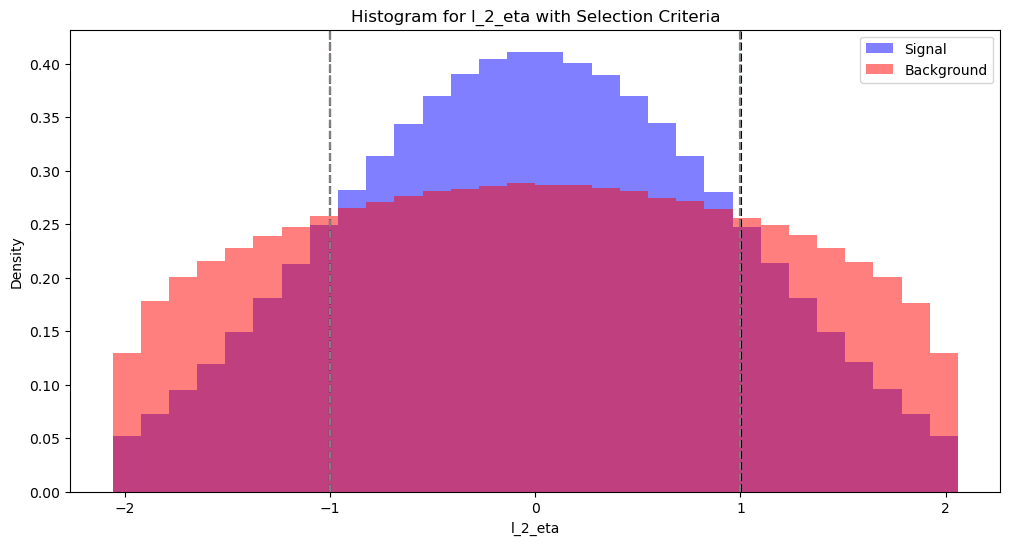

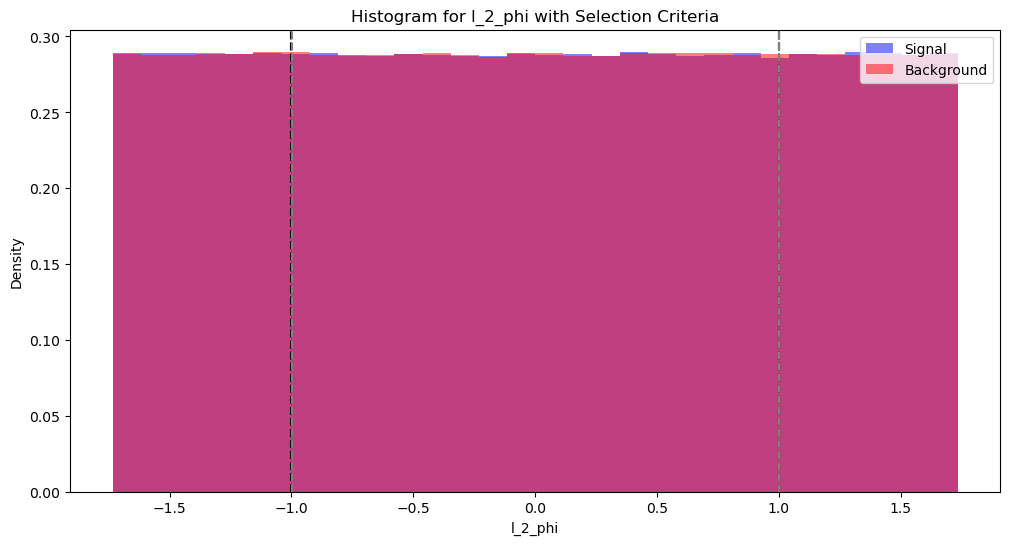

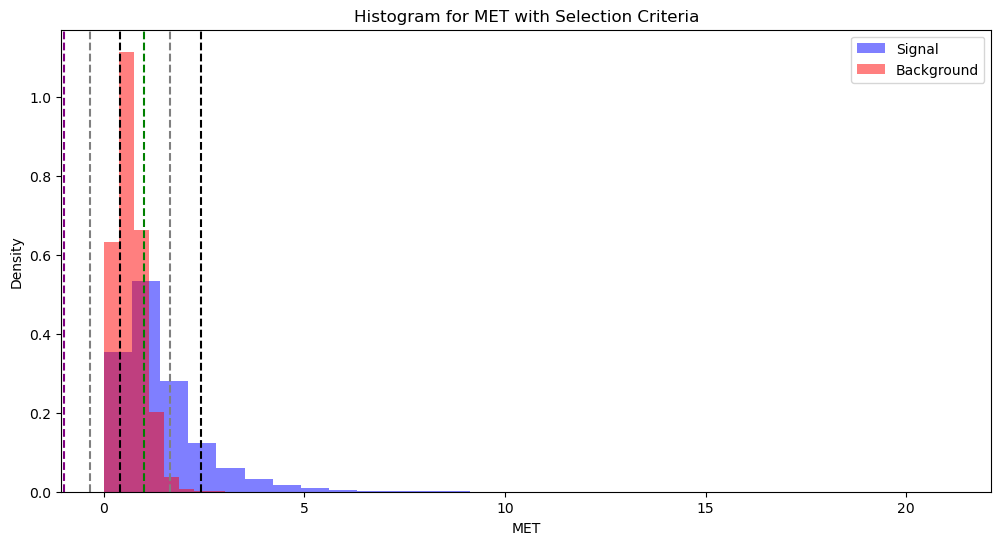

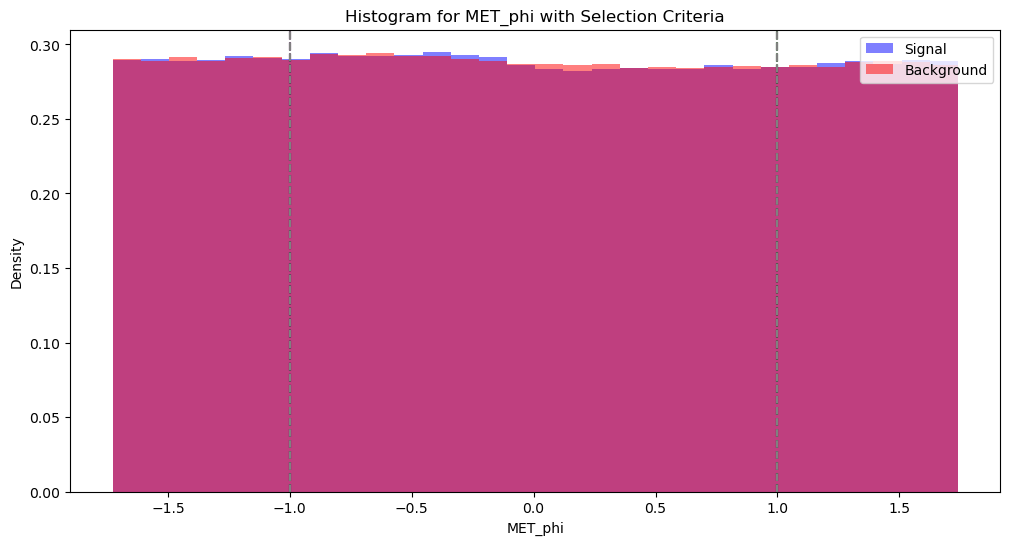

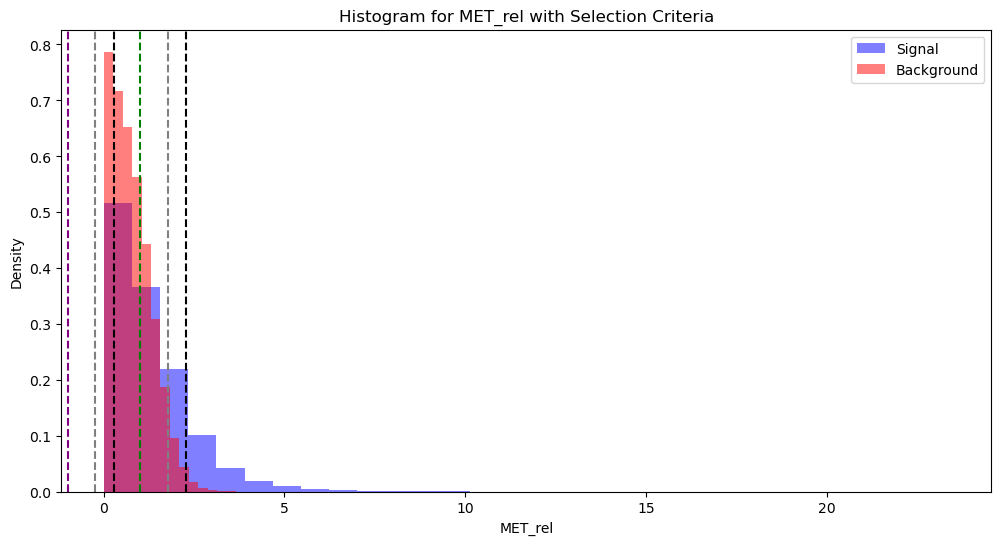

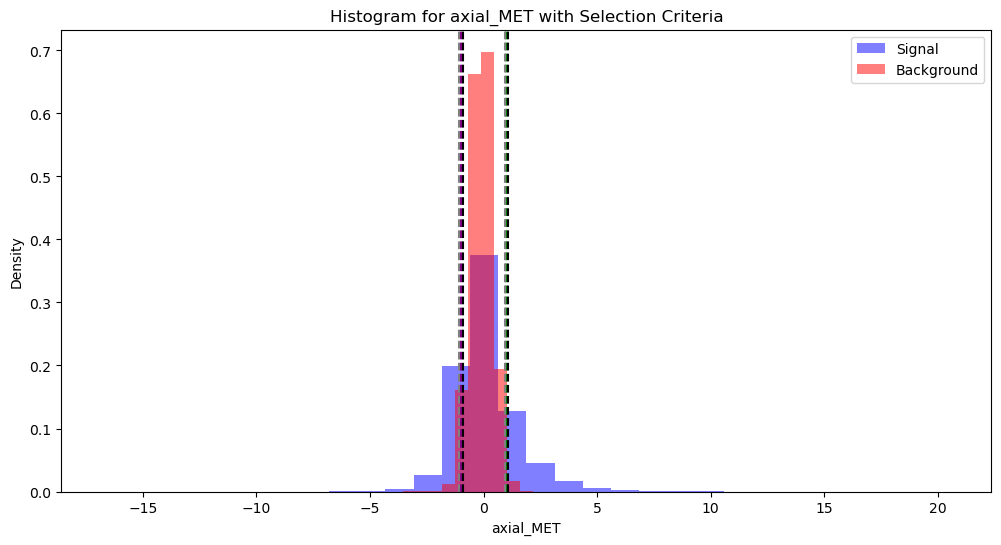

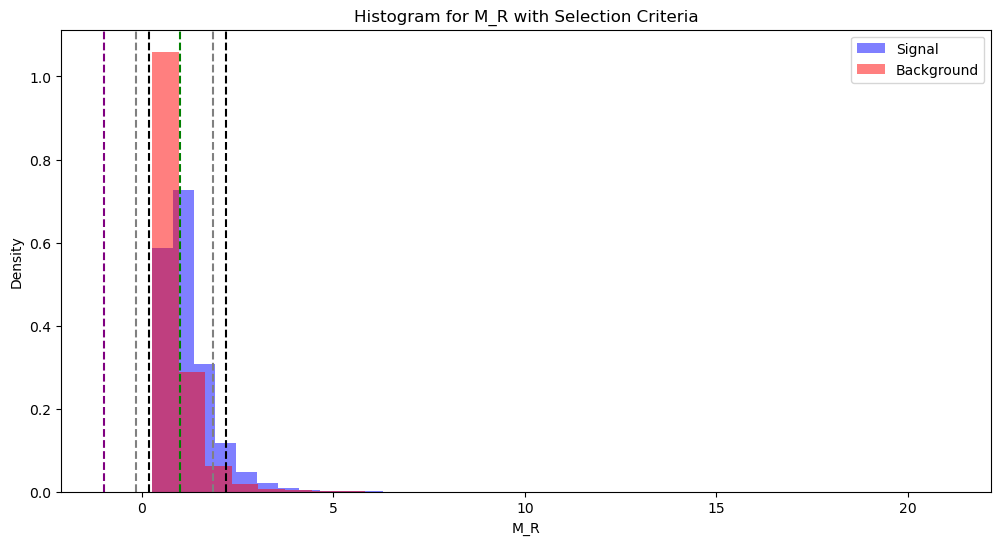

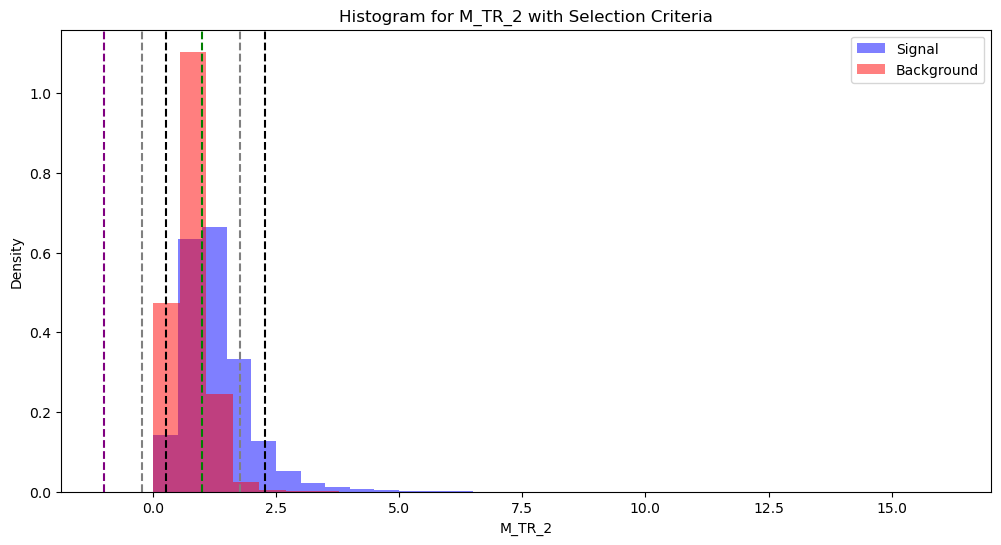

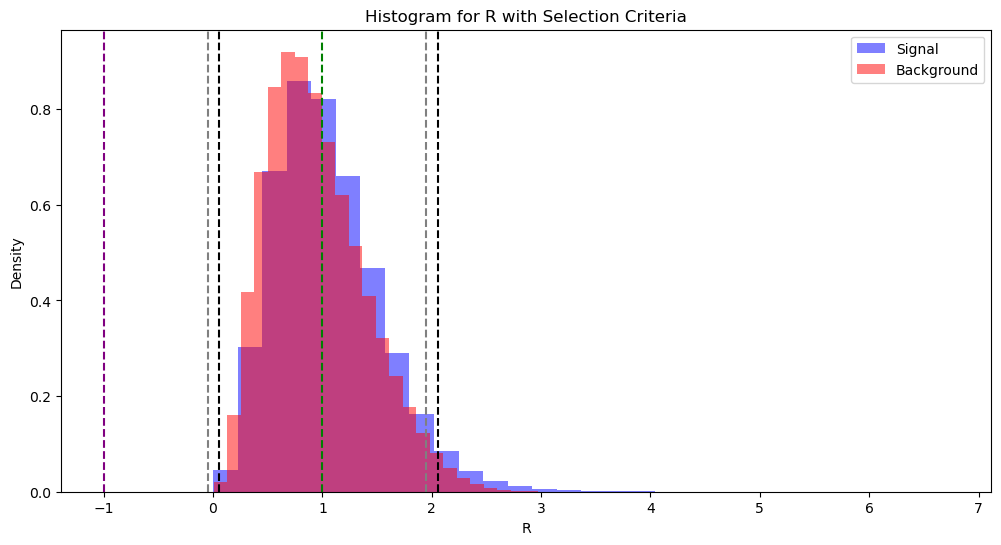

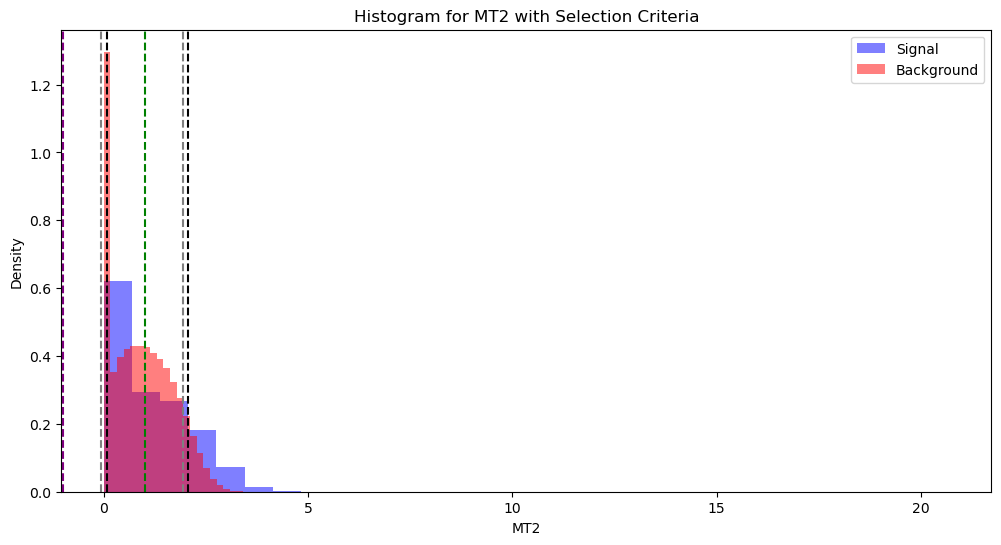

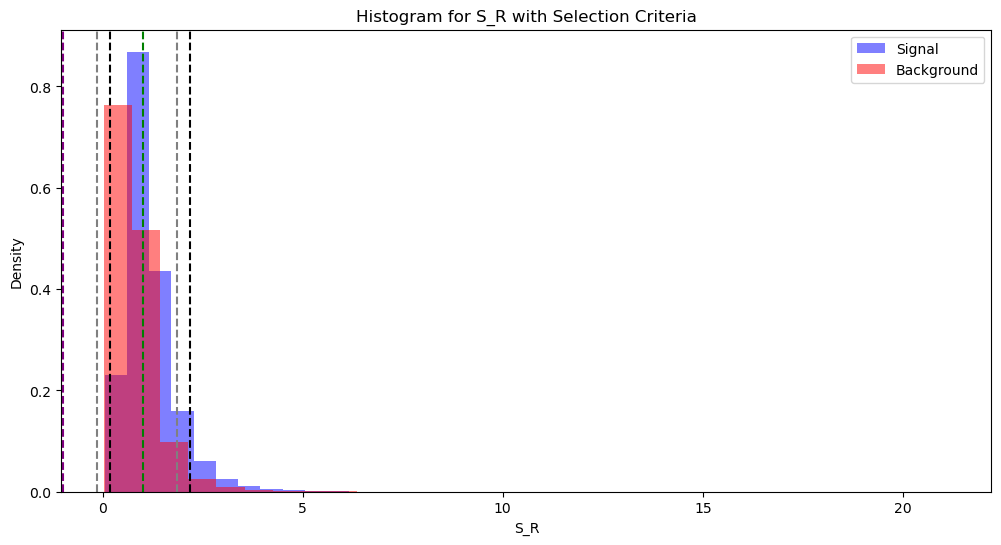

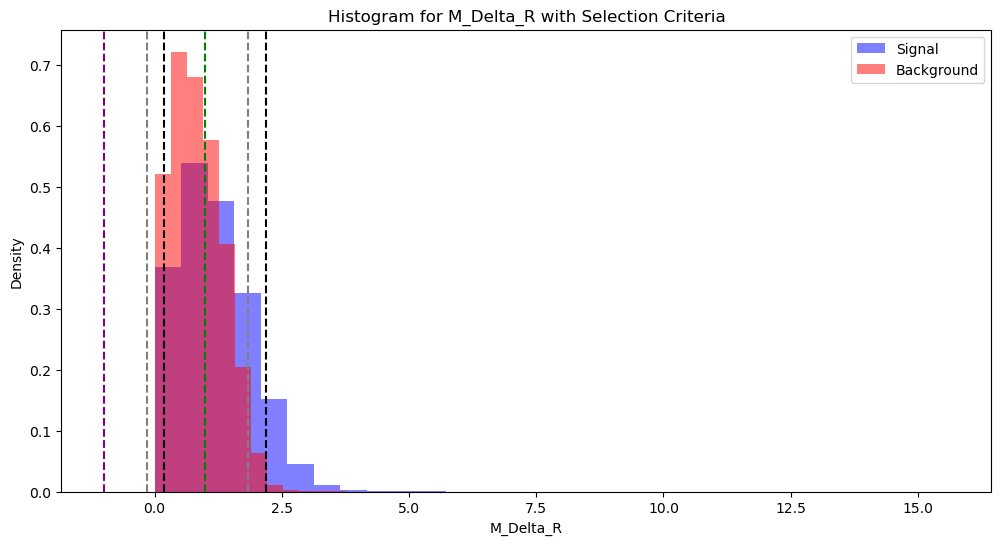

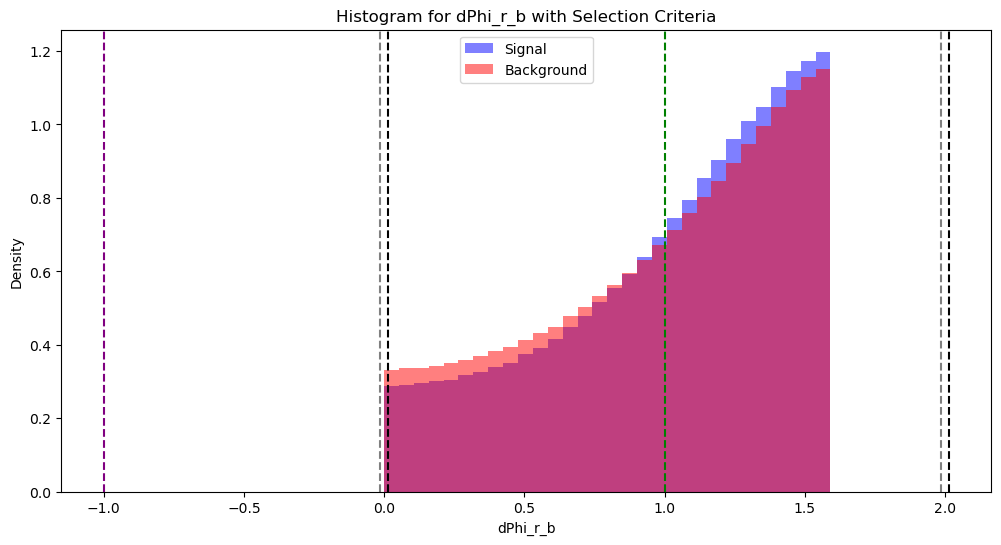

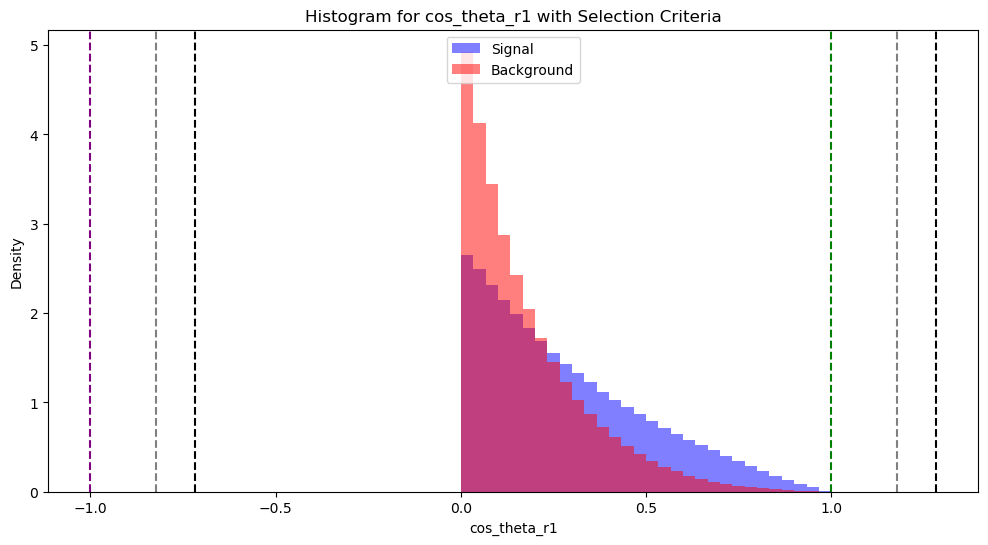

In [30]:


x_c = 1.0

for feature in raw_features + high_level_features:
    mu_sig = df_sig[feature].mean()
    mu_bkg = df_bkg[feature].mean()
    
    plt.figure(figsize=(12, 6))
    plt.hist(df_sig[feature], bins=30, alpha=0.5, label='Signal', color='blue', density=True)
    plt.hist(df_bkg[feature], bins=30, alpha=0.5, label='Background', color='red', density=True)
    
    if feature == raw_features[0]: 
        plt.axvline(x_c, color='green', linestyle='--', label=f'x > {x_c}')
        plt.axvline(-x_c, color='purple', linestyle='--', label=f'x < {x_c}')
        plt.axvline(mu_sig + x_c, color='black', linestyle='--', label=f'|x - μ| > {x_c} (Signal mean)')
        plt.axvline(mu_sig - x_c, color='black', linestyle='--')
        plt.axvline(mu_bkg + x_c, color='grey', linestyle='--', label=f'|x - μ| > {x_c} (Background mean)')
        plt.axvline(mu_bkg - x_c, color='grey', linestyle='--')
    else:
        plt.axvline(x_c, color='green', linestyle='--')
        plt.axvline(-x_c, color='purple', linestyle='--')
        plt.axvline(mu_sig + x_c, color='black', linestyle='--')
        plt.axvline(mu_sig - x_c, color='black', linestyle='--')
        plt.axvline(mu_bkg + x_c, color='grey', linestyle='--')
        plt.axvline(mu_bkg - x_c, color='grey', linestyle='--')
    
    plt.title(f'Histogram for {feature} with Selection Criteria')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


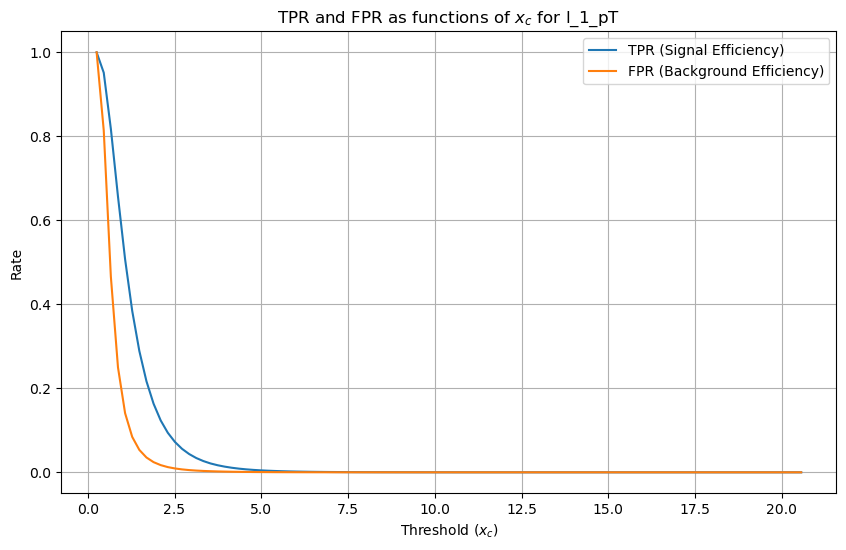

In [31]:


feature = "l_1_pT"

signal_data = df[df['signal'] == 1][feature]
background_data = df[df['signal'] == 0][feature]

x_c_values = np.linspace(min(df[feature]), max(df[feature]), 100)

tpr_values = []
fpr_values = []

for x_c in x_c_values:
    tpr = np.sum(signal_data > x_c) / len(signal_data)
    fpr = np.sum(background_data > x_c) / len(background_data)
    tpr_values.append(tpr)
    fpr_values.append(fpr)

plt.figure(figsize=(10, 6))
plt.plot(x_c_values, tpr_values, label="TPR (Signal Efficiency)")
plt.plot(x_c_values, fpr_values, label="FPR (Background Efficiency)")
plt.xlabel("Threshold ($x_c$)")
plt.ylabel("Rate")
plt.title(f"TPR and FPR as functions of $x_c$ for {feature}")
plt.legend()
plt.grid(True)
plt.show()


<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1065/873530418.py:26: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("Significance ($\sigma_{S'}$)")
/tmp/ipykernel_1065/873530418.py:27: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"Significance $\sigma_{{S'}}$ as function of $x_c$ for {feature}")


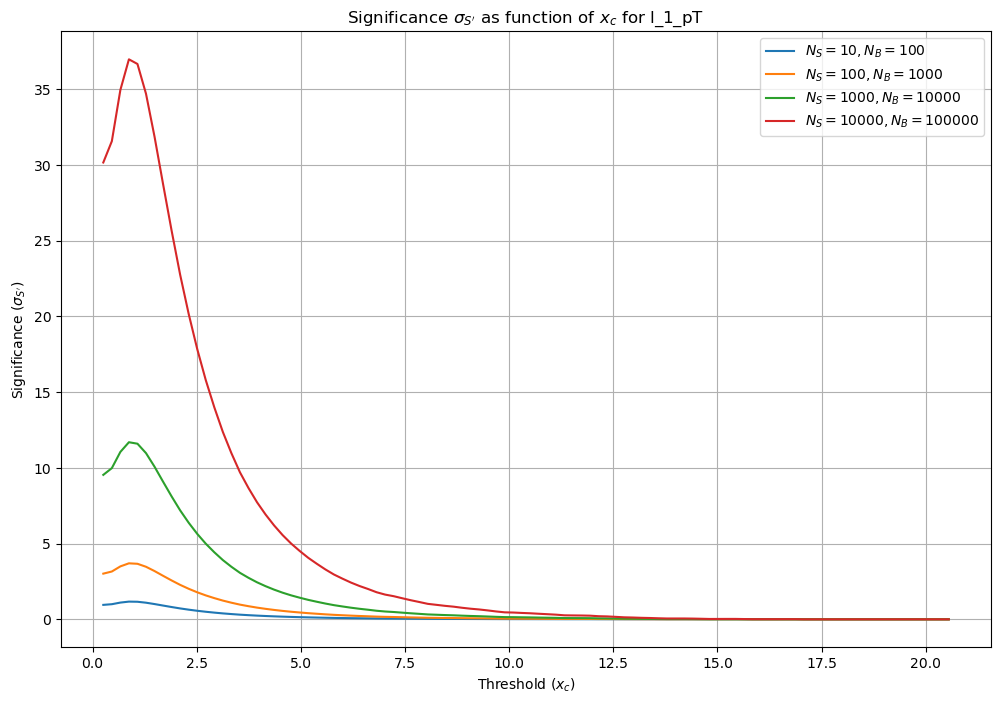

In [32]:
scenarios = [
    {"N_S": 10, "N_B": 100},
    {"N_S": 100, "N_B": 1000},
    {"N_S": 1000, "N_B": 10000},
    {"N_S": 10000, "N_B": 100000}
]

plt.figure(figsize=(12, 8))

for scenario in scenarios:
    N_S, N_B = scenario["N_S"], scenario["N_B"]
    significance_values = []
    
    for tpr, fpr in zip(tpr_values, fpr_values):
        N_S_prime = tpr * N_S
        N_B_prime = fpr * N_B
        if N_S_prime + N_B_prime > 0:
            sigma_S_prime = N_S_prime / np.sqrt(N_S_prime + N_B_prime)
        else:
            sigma_S_prime = 0
        significance_values.append(sigma_S_prime)
    
    plt.plot(x_c_values, significance_values, label=f"$N_S={N_S}, N_B={N_B}$")

plt.xlabel("Threshold ($x_c$)")
plt.ylabel("Significance ($\sigma_{S'}$)")
plt.title(f"Significance $\sigma_{{S'}}$ as function of $x_c$ for {feature}")
plt.legend()
plt.grid(True)
plt.show()


# 8

Total samples: 5000000
Signal samples: 2287827
Background samples: 2712173

After sampling:
Signal samples: 45701
Background samples: 54299


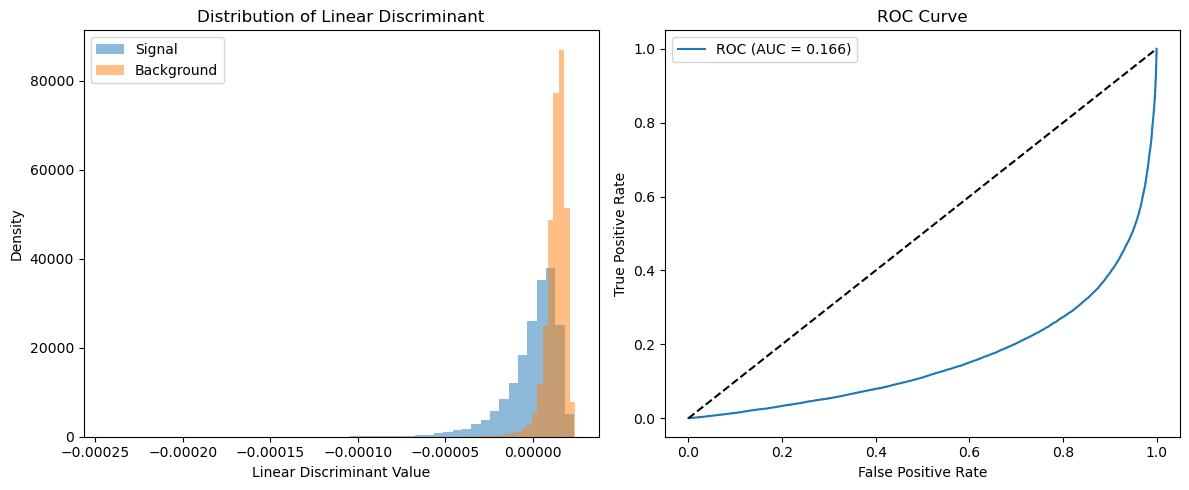

Scenario N_S=10, N_B=100:
Maximum significance: 0.95
Optimal threshold: -0.00

Scenario N_S=100, N_B=1000:
Maximum significance: 3.02
Optimal threshold: -0.00

Scenario N_S=1000, N_B=10000:
Maximum significance: 9.53
Optimal threshold: -0.00

Scenario N_S=10000, N_B=100000:
Maximum significance: 30.15
Optimal threshold: -0.00


Linear Discriminant Coefficients:
l_1_pT: -0.0000
l_1_eta: 0.0000
l_1_phi: 0.0000
l_2_pT: 0.0000
l_2_eta: -0.0000
l_2_phi: -0.0000
MET: -0.0000
MET_phi: -0.0000


In [34]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

raw_features = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]

df = pd.read_csv("SUSY.csv", names=["signal"] + raw_features + high_level_features)

print("Total samples:", len(df))
print("Signal samples:", len(df[df['signal'] == 1]))
print("Background samples:", len(df[df['signal'] == 0]))


sample_size = 100000  
df = df.sample(n=sample_size, random_state=42)

X_signal = df[df['signal'] == 1][raw_features].values
X_background = df[df['signal'] == 0][raw_features].values

print("\nAfter sampling:")
print("Signal samples:", len(X_signal))
print("Background samples:", len(X_background))

if len(X_signal) == 0 or len(X_background) == 0:
    raise ValueError("One or both classes have no samples!")

scaler = StandardScaler()
X_signal_scaled = scaler.fit_transform(X_signal)
X_background_scaled = scaler.transform(X_background)

m1 = np.mean(X_signal_scaled, axis=0) 
m2 = np.mean(X_background_scaled, axis=0)  

diff = (m2 - m1).reshape(-1, 1)
S_B = np.dot(diff, diff.T)

S_W = np.zeros((X_signal_scaled.shape[1], X_signal_scaled.shape[1]))

for x in X_signal_scaled:
    diff = (x - m1).reshape(-1, 1)
    S_W += np.dot(diff, diff.T)

for x in X_background_scaled:
    diff = (x - m2).reshape(-1, 1)
    S_W += np.dot(diff, diff.T)

S_W += np.eye(S_W.shape[0]) * 1e-10

w = np.linalg.solve(S_W, (m2 - m1))

F_signal = np.dot(X_signal_scaled, w)
F_background = np.dot(X_background_scaled, w)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(F_signal, bins=50, alpha=0.5, label='Signal', density=True)
plt.hist(F_background, bins=50, alpha=0.5, label='Background', density=True)
plt.xlabel('Linear Discriminant Value')
plt.ylabel('Density')
plt.title('Distribution of Linear Discriminant')
plt.legend()

plt.subplot(1, 2, 2)
y_true = np.concatenate([np.ones(len(F_signal)), np.zeros(len(F_background))])
scores = np.concatenate([F_signal, F_background])
fpr, tpr, _ = roc_curve(y_true, scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

scenarios = [
    {"N_S": 10, "N_B": 100},
    {"N_S": 100, "N_B": 1000},
    {"N_S": 1000, "N_B": 10000},
    {"N_S": 10000, "N_B": 100000}
]

for scenario in scenarios:
    N_S = scenario["N_S"]
    N_B = scenario["N_B"]
    
    thresholds = np.linspace(min(np.concatenate([F_signal, F_background])),
                           max(np.concatenate([F_signal, F_background])),
                           100)
    
    max_significance = 0
    optimal_threshold = None
    
    for threshold in thresholds:
        n_s = np.sum(F_signal > threshold) / len(F_signal) * N_S
        n_b = np.sum(F_background > threshold) / len(F_background) * N_B
        
        if n_s + n_b > 0:
            significance = n_s / np.sqrt(n_s + n_b)
            if significance > max_significance:
                max_significance = significance
                optimal_threshold = threshold
    
    print(f"Scenario N_S={N_S}, N_B={N_B}:")
    print(f"Maximum significance: {max_significance:.2f}")
    print(f"Optimal threshold: {optimal_threshold:.2f}\n")

print("\nLinear Discriminant Coefficients:")
for feature, coef in zip(raw_features, w):
    print(f"{feature}: {coef:.4f}")